In [1]:
import pandas as pd
import json
from datetime import datetime
import os
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from utils.generateFinalRow import generateFinalRows
# from utils.generateRelativeRow import getRelativeRows


ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedPriceSpinoffExcl1Year', 'yAdjustedPrice1Year', 'yPrice1Year']
y2Keys = ['yAdjustedPriceSpinoffExcl2Year', 'yAdjustedPrice2Year', 'yPrice2Year']
numericalKeys = ratioKeys + yKeys + y2Keys

In [2]:
if not os.path.isfile('../data/temp.csv'):
    fileNames = os.listdir('../data/results')
    companyDf = pd.DataFrame()
    i = 0
    for fileName in fileNames:
        with open('../data/results/' + fileName) as json_data:
            data = json.load(json_data)
            companyDf, i = generateFinalRows(data, ratioKeys, fileName, i, companyDf)
    companyDf.to_csv('../data/temp.csv', sep='\t')


df = pd.read_csv('../data/temp.csv', sep='\t')


In [6]:
from utils.generateRelativeRow import getRelativeRows
if not os.path.isfile('../data/temp-relative.csv'):
    fileNames = os.listdir('../data/results')
    companyDf = pd.DataFrame()
    i = 0
    for fileName in fileNames:
        with open('../data/results/' + fileName) as json_data:
            data = json.load(json_data)
            companyDf, i = getRelativeRows(data, ratioKeys, fileName, i, companyDf)
    companyDf.to_csv('../data/temp-relative.csv', sep='\t')
    
relativeDf = pd.read_csv('../data/temp.csv', sep='\t')


In [3]:
# TODO: DROP evToSales evToGrossProfit and calculate other columns again. More data will be available

In [12]:
# df = df.dropna()
# TODO: normalize ratios. Could have better results.
dfNorm = pd.DataFrame(normalize(df[ratioKeys]), columns=ratioKeys)
dfY = df[yKeys + y2Keys]
dfNorm = dfNorm.join(dfY)

dfRelativeNorm = pd.DataFrame(normalize(relativeDf[ratioKeys]), columns=ratioKeys)
dfY = df[yKeys + y2Keys]
dfRelativeNorm = dfRelativeNorm.join(dfY)

In [ ]:
dfNorm

In [ ]:
relativeDf

Text(0.5, 1.0, 'Not normalized RELATIVE values')

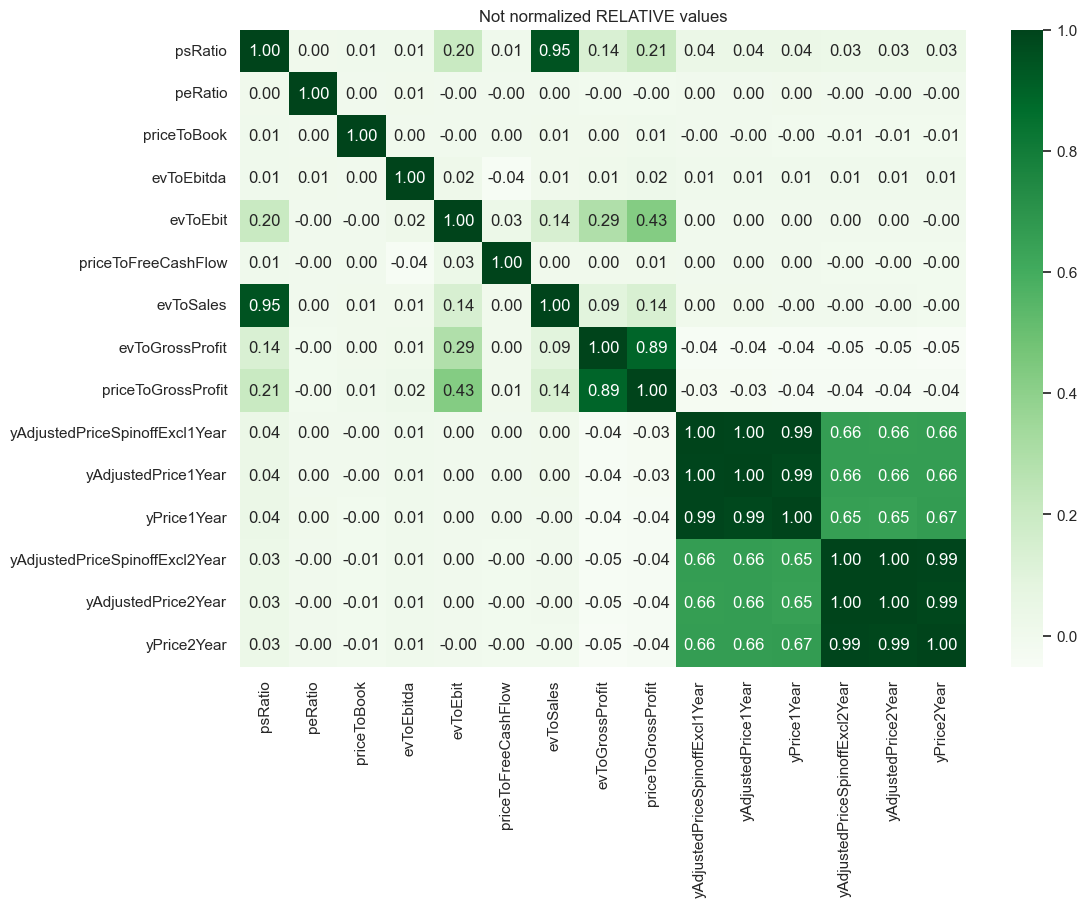

In [17]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
matrix = relativeDf[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Not normalized RELATIVE values")

Text(0.5, 1.0, 'Normalized RELATIVE values')

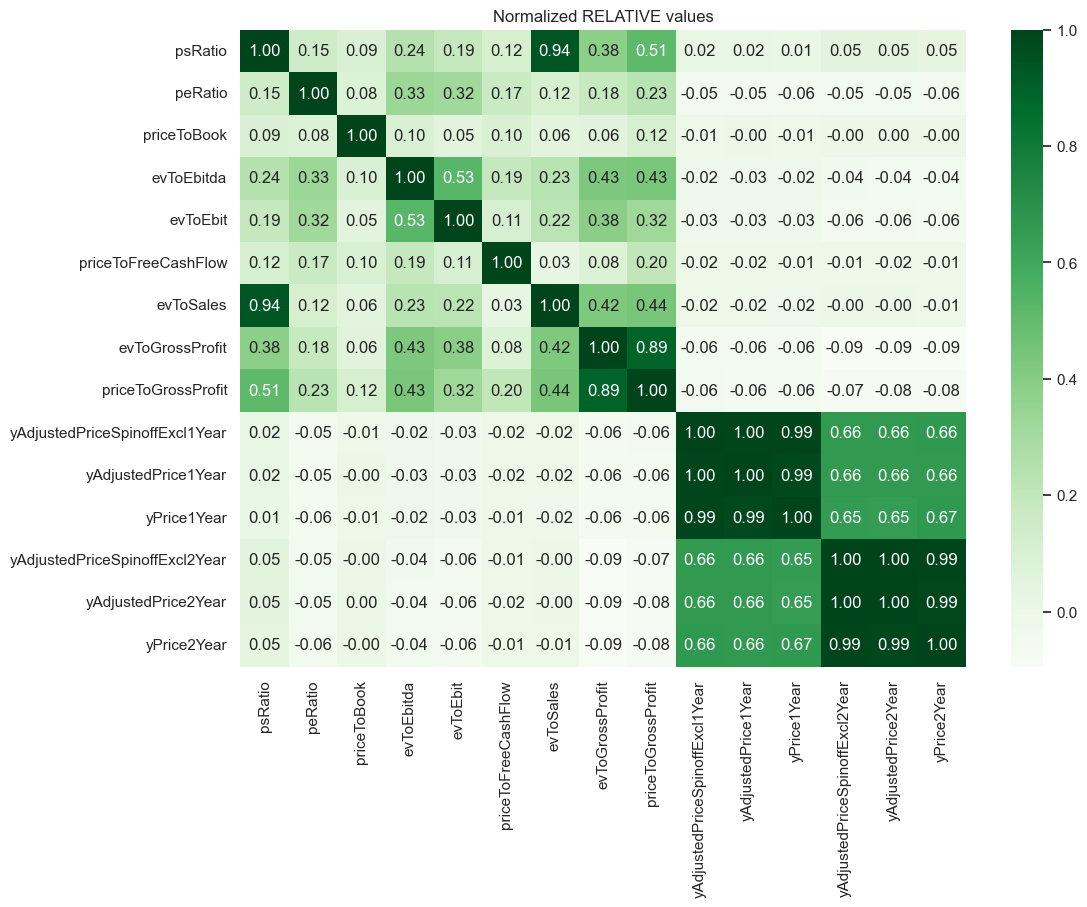

In [18]:
matrix = dfRelativeNorm[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Normalized RELATIVE values")

Text(0.5, 1.0, 'Not normalized absolute values')

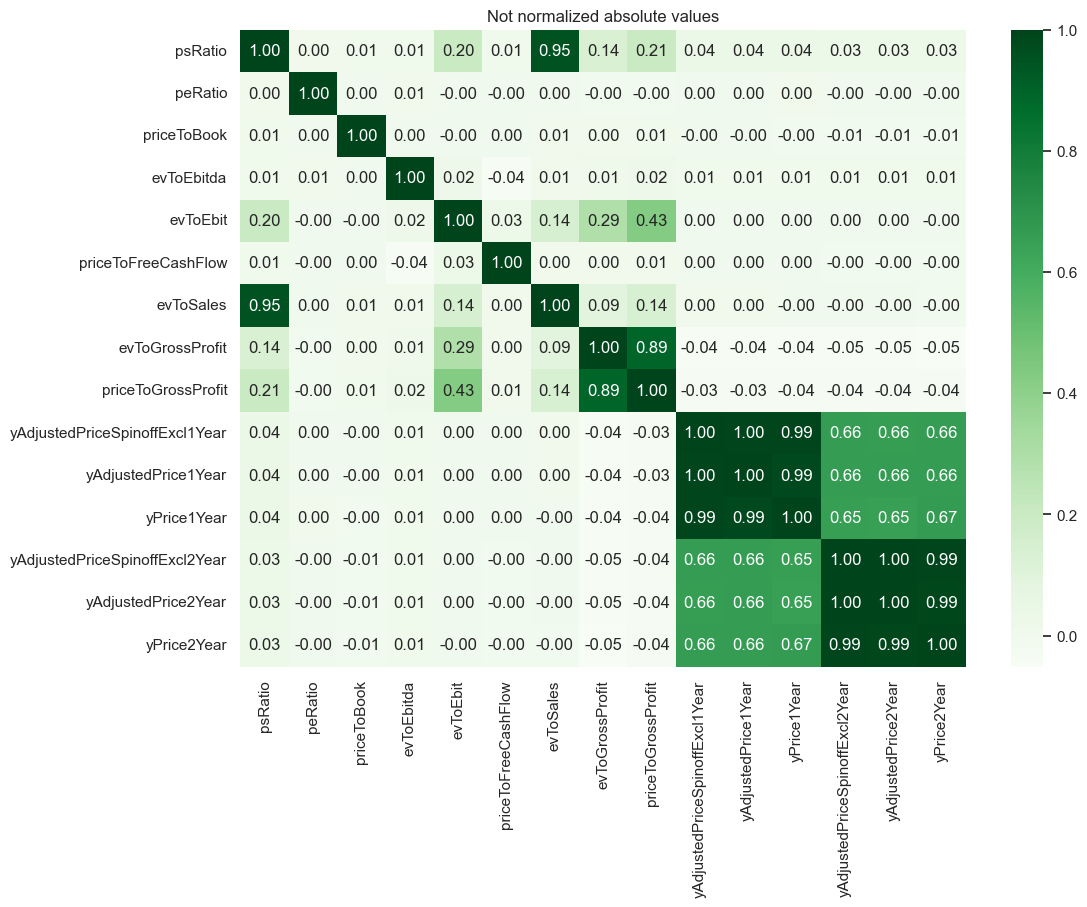

In [19]:
matrix = df[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Not normalized absolute values")

Text(0.5, 1.0, 'Normalized absolute values')

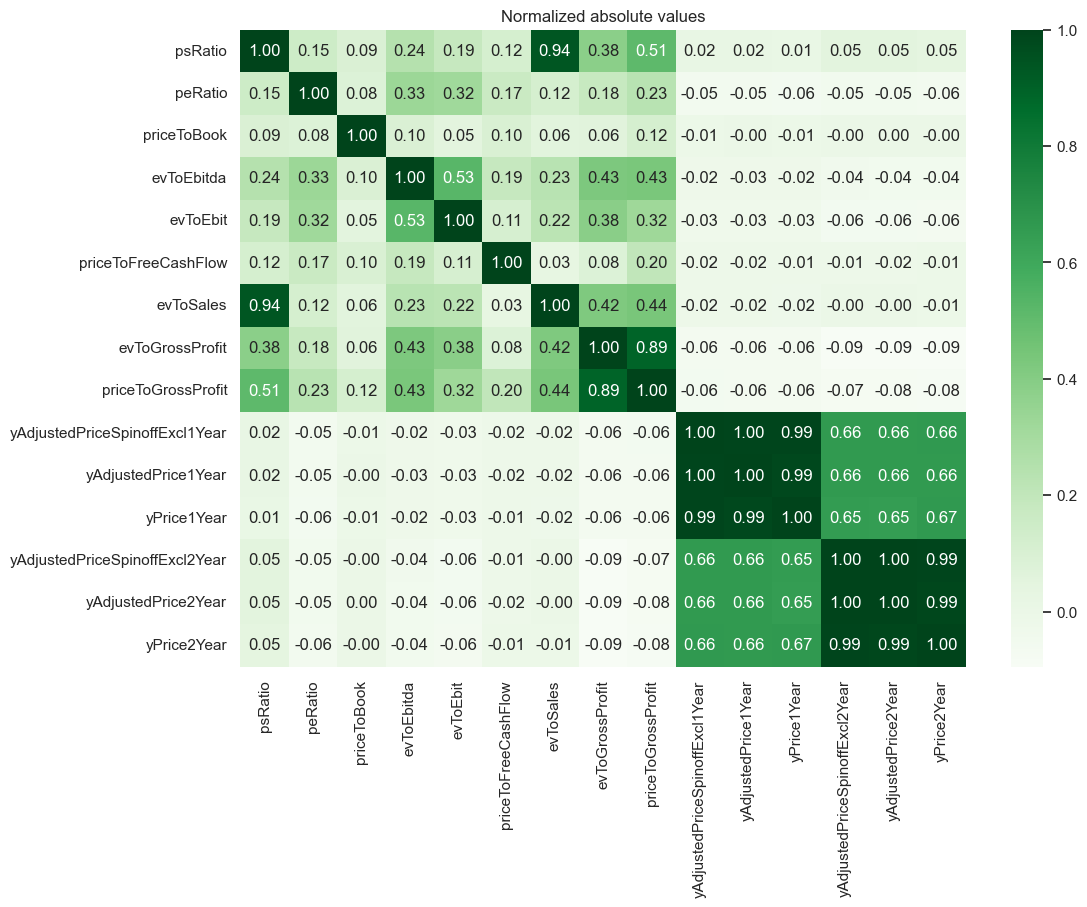

In [20]:
matrix = dfNorm.corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Normalized absolute values")

In [9]:

# for i, key in enumerate(keys):
#     med = statistics.median(df[key])
#     mean = statistics.mean(df[key])
#     # print("key: {}, median: {}, mean: {}".format(key, med, round(mean, 2)))
#     
#     # TODO: outliers from returns too
#     q_low = df[key].quantile(0.01)
#     q_hi  = df[key].quantile(0.99)
#     
#     df_filtered = df[(df[key] < q_hi) & (df[key] > q_low)]
    # sns.scatterplot(data=df_filtered, x=key, y='yAdjustedTotalPrice')
    # plt.show()
